**3. NLP Pipeline**


**-Sentiment Analysis and predictions using Naive Bayes Classification**



In [1]:
# Import Libraries

import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import gensim.downloader as api

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline


c:\Users\pdhiman\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data

**Data Preprocessing**

In [2]:
# Loading All the tweets 

df = pd.read_csv('data/tweets_final.csv')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,NaN,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [3]:
### Data Cleaning 

# Checking Locations which are NaN
df.location.isna().sum()

7809

In [4]:
### Data Cleaning 

# Replacing NaN location values with Unknown
df['location'] = df['location'].fillna('Unknown')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [5]:
### Data Cleaning 

# Dropping non english tweets.

df.drop(df[(df['language'] != 'en')].index, inplace=True)
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en


In [6]:
### Data Cleaning 

# Removing Emojis , URLs, @ , Stopwords etc.

words = set(nltk.corpus.words.words())
eng_stopwords = []
with open('data/stopwords.txt','r') as file:    
      for line in file:         
          for sw in line.split():            
              eng_stopwords.append(sw)
emoji = list(UNICODE_EMOJI.keys())

def ProcessedTweets(text):
    text = text.lower()  #changing tweet text to small letters 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split()) # Removing @ and links
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text) # removing repeating characters
    punct = str.maketrans('', '', string.punctuation+string.digits) # removing punctuation and numbers
    text = text.translate(punct)
    
    tokens = word_tokenize(text)  # tokenizing words and removing stop words from the tweet text
    filtered_words = [w for w in tokens if w not in eng_stopwords] #check for stopwords, remove them
    filtered_words = [w for w in filtered_words if w not in emoji] #remove emoji

    #also removed the words not in NLTK words dictionary of set(nltk.corpus.words.words())
    filtered_words1 = [w2 for w2 in filtered_words if w2 in words or w2 in {'democrats', 'dem', 'dems'}]
    #check for synonyms using wordnet 
    
    # lemmetizing words
    #lemmatizer = WordNetLemmatizer() 
    #lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    #text = " ".join(lemma_words)
    
    text = " ".join(filtered_words1) #without wordnet and lemmatizing
    return text


In [ ]:
df['Processed_Tweets'] = df['tweet'].apply(ProcessedTweets)

**Sentiment Analysis**


In [7]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#decide the polarity of sentiments using this textblob function, difficult to do it for 20,000 tweets manually.
def sentimenttextblob(polarity):
    if polarity < 0:
        return -1 
        #"Negative"
    elif polarity == 0:
        return 0 
        #"Neutral"
    else:
        return 1 
        #"Positive" 

In [9]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sentiments = df['Sentiment'].value_counts()
sentiments

 0    8337
 1    7169
-1    3180
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x23f8a57ed90>,
 [Text(-1.0999839696622016, -0.0059385592684765955, 'Neutral'),
  Text(0.949509958327149, -0.5553655004027311, 'Positive'),
  Text(0.3876108820444823, 1.0294453866624973, 'Negative')],
 [Text(-0.5999912561793825, -0.003239214146441779, '44.6%'),
  Text(0.5179145227238994, -0.3029266365833078, '38.4%'),
  Text(0.2114241174788085, 0.5615156654522712, '17.0%')])

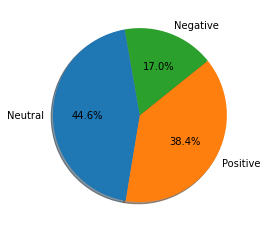

In [10]:
labels = ['Neutral', 'Positive', 'Negative']
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)

**Preparing for NB**

**CountVectorizer** creates a matrix in which each unique word is represented by a column of the matrix, and each text sample 
#from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular 
#text sample
#how many times given words were found in the document.
#sparse matrix

#document[0]	0	0	0	1	1	0	0	1	0	1	0	1

#document[1]	0	0	1	0	2	0	1	0	0	0	0	1

#document[2]	1	1	0	1	1	1	0	1	1	0	1	0

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [12]:
#Initializing lists to be used in plotting later.
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [13]:
def naivebayesCV():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        cv = CountVectorizer(stop_words='english',ngram_range = (n,n), tokenizer = token.tokenize)
        text_counts = cv.fit_transform(df['Processed_Tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(Y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(Y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(Y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(Y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        #print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        #print(confusion_mat)
        #print("\nClassification Report for k = {} is:\n".format(k))
        #print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [14]:
naivebayesCV()

Accuracy Score for ngrams = 1 is: 82.0%
Recall for ngrams = 1 is: 78.0%
Precision for ngrams = 1 is: 79.0%
F1-score for ngrams = 1 is: 78.0%
Accuracy Score for ngrams = 2 is: 62.0%
Recall for ngrams = 2 is: 53.0%
Precision for ngrams = 2 is: 61.0%
F1-score for ngrams = 2 is: 53.0%
Accuracy Score for ngrams = 3 is: 52.0%
Recall for ngrams = 3 is: 41.0%
Precision for ngrams = 3 is: 67.0%
F1-score for ngrams = 3 is: 36.0%
Accuracy Score for ngrams = 5 is: 49.0%
Recall for ngrams = 5 is: 38.0%
Precision for ngrams = 5 is: 80.0%
F1-score for ngrams = 5 is: 28.999999999999996%


<function matplotlib.pyplot.show(close=None, block=None)>

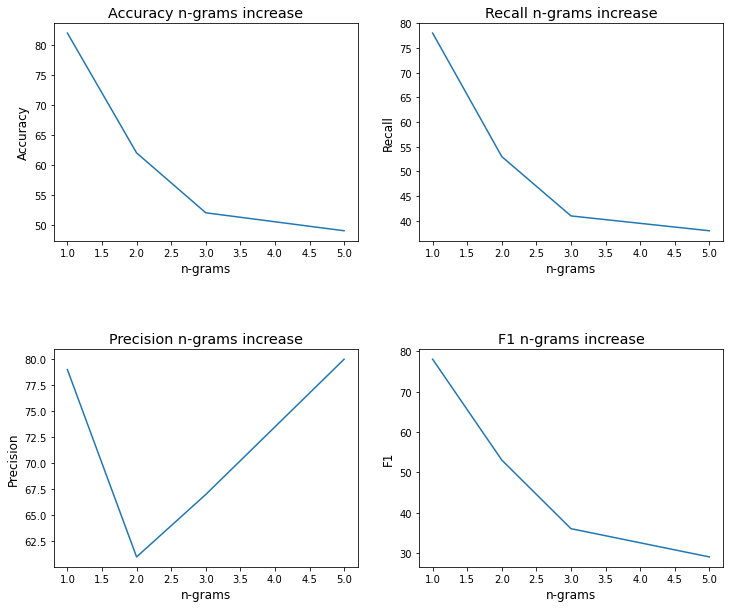

In [15]:
#print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=0.5)

plt.show

In [16]:
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
def naivebayesTFIDF():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        tfidf = TfidfVectorizer(stop_words='english',ngram_range = (n,n), analyzer='word', use_idf=True)#tokenizer = token.tokenize)
        text_count2 = tfidf.fit_transform(df['Processed_Tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_count2, df['Sentiment'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(Y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(Y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(Y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(Y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        #print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        #print(confusion_mat)
        #print("\nClassification Report for k = {} is:\n".format(k))
        #print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [18]:
naivebayesTFIDF()

Accuracy Score for ngrams = 1 is: 77.0%
Recall for ngrams = 1 is: 66.0%
Precision for ngrams = 1 is: 83.0%
F1-score for ngrams = 1 is: 65.0%
Accuracy Score for ngrams = 2 is: 60.0%
Recall for ngrams = 2 is: 47.0%
Precision for ngrams = 2 is: 78.0%
F1-score for ngrams = 2 is: 43.0%
Accuracy Score for ngrams = 3 is: 52.0%
Recall for ngrams = 3 is: 40.0%
Precision for ngrams = 3 is: 78.0%
F1-score for ngrams = 3 is: 33.0%
Accuracy Score for ngrams = 5 is: 48.0%
Recall for ngrams = 5 is: 37.0%
Precision for ngrams = 5 is: 82.0%
F1-score for ngrams = 5 is: 27.0%


<function matplotlib.pyplot.show(close=None, block=None)>

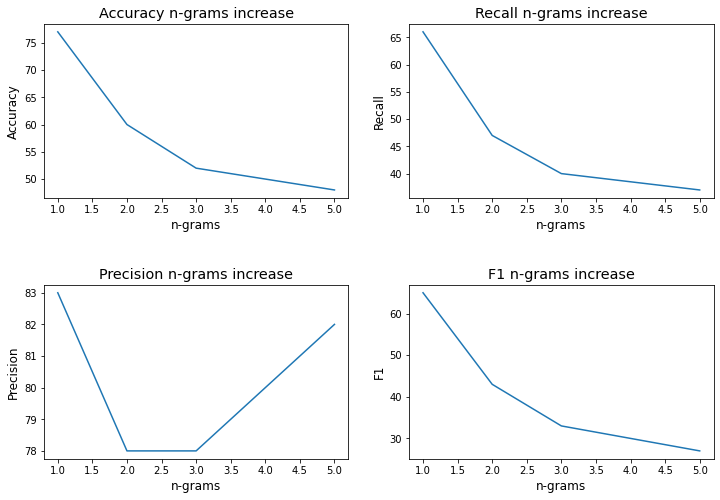

In [19]:
#print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show